# Why They Leave - Telco Customer Churn

In [2]:
#Import library we are going to use
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


In [3]:
#reading the dataset
df = pd.read_csv('/content/Telco_customer_churn_edited.csv', sep=None, engine="python")
df.sample(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2287,3716-UVSPD,1,United States,California,San Juan Capistrano,92675,"33.521447, -117.602555",33.521447,-117.602555,Male,...,Month-to-month,Yes,Electronic check,49.30,49.3,No,0,45,4209,NaN
680,7593-JNWRU,1,United States,California,Fremont,94538,"37.505768, -121.962472",37.505768,-121.962472,Male,...,Month-to-month,Yes,Bank transfer (automatic),44.60,260.8,Yes,1,90,4525,Extra data charges
2546,0835-JKADZ,1,United States,California,San Francisco,94107,"37.768881, -122.395521",37.768881,-122.395521,Female,...,Two year,Yes,Electronic check,111.25,7984.15,No,0,54,4361,NaN
4804,6194-HBGQN,1,United States,California,Taft,93268,"35.184837, -119.402525",35.184837,-119.402525,Male,...,One year,Yes,Credit card (automatic),81.15,4126.2,No,0,56,4549,NaN
3506,1153-GNOLC,1,United States,California,Santa Ana,92707,"33.714829, -117.872941",33.714829,-117.872941,Male,...,One year,Yes,Electronic check,39.10,1309,No,0,40,2855,NaN


In [4]:
#to give the glimpse of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

due to this dataset about customer churn, i want to focus analysis to explore what variable influence customer churn.

Total Charges it should be Numeric not Object so we need to change into numerical.

# Change Data Types

In [5]:
# changing the column Total Charges into numeric, changing non-numeric into NaN
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")

df[df["Total Charges"].isnull()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


In [6]:
#remove space and change into _ in column
df.columns = df.columns.str.strip()            # change space in the begining and end
df.columns = df.columns.str.replace(' ', '_')  # change space into _

# Missing Value Checking

In [7]:
#I want to know how many Missing Value do we have.
df.isna().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip_Code,0
Lat_Long,0
Latitude,0
Longitude,0
Gender,0


We have 5174 missing value in the column Churn_Reason due to the member still active so they don't have reason to churn/leaving.

so we leave that missing value.

and we have 11 missing value in Total_Charges Column

# Handling Missing Value

In [8]:
df['Total_Charges'].fillna(df['Total_Charges'].median(), inplace=True)
print(df.isnull().sum())

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip_Code                0
Lat_Long                0
Latitude                0
Longitude               0
Gender                  0
Senior_Citizen          0
Partner                 0
Dependents              0
Tenure_Months           0
Phone_Service           0
Multiple_Lines          0
Internet_Service        0
Online_Security         0
Online_Backup           0
Device_Protection       0
Tech_Support            0
Streaming_TV            0
Streaming_Movies        0
Contract                0
Paperless_Billing       0
Payment_Method          0
Monthly_Charges         0
Total_Charges           0
Churn_Label             0
Churn_Value             0
Churn_Score             0
CLTV                    0
Churn_Reason         5174
dtype: int64


# Handling Duplicate

In [9]:
#checking whether we have duplicate or not.
df[df.duplicated(keep=False)]
df.duplicated().sum()

np.int64(0)

No duplicated in the dataset

# Handling Outliers

In [10]:
#i want to know all column that contains int and float types
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)

Index(['Count', 'Zip_Code', 'Latitude', 'Longitude', 'Tenure_Months',
       'Monthly_Charges', 'Total_Charges', 'Churn_Value', 'Churn_Score',
       'CLTV'],
      dtype='object')


In [11]:
#making quantile in that num_col
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# outliers conditions
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR)))

# count outliers per column
outliers_sum = outliers.sum().sort_values(ascending=False)
print(outliers_sum)

Count              0
Zip_Code           0
Latitude           0
Longitude          0
Tenure_Months      0
Monthly_Charges    0
Total_Charges      0
Churn_Value        0
Churn_Score        0
CLTV               0
dtype: int64


There is no outlier in the dataset.

# Data Visualization (EDA)

# Churn Exploration

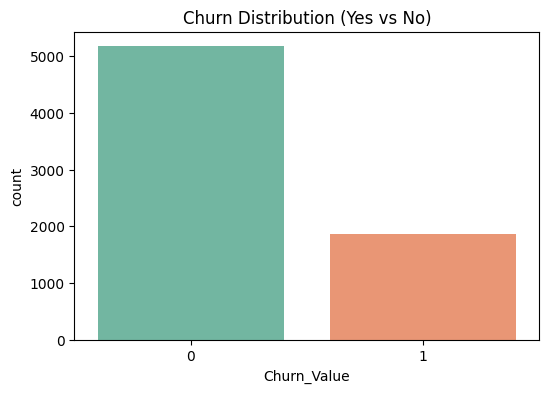

,count
Churn_Value,
0,5174
1,1869


In [12]:
#making visualisation for Customer Churn
plt.figure(figsize=(6,4))
sns.countplot(x='Churn_Value', data=df, palette='Set2')
plt.title('Churn Distribution (Yes vs No)')
plt.show()

#how many customer churn do we have ATM
df['Churn_Value'].value_counts()

In [13]:
#how many in persentage
df['Churn_Value'].value_counts(normalize=True) * 100

,proportion
Churn_Value,
0,73.463013
1,26.536987


We have 1869 Customer Churn (26.53%)

# Churn Value berdasarkan Contract

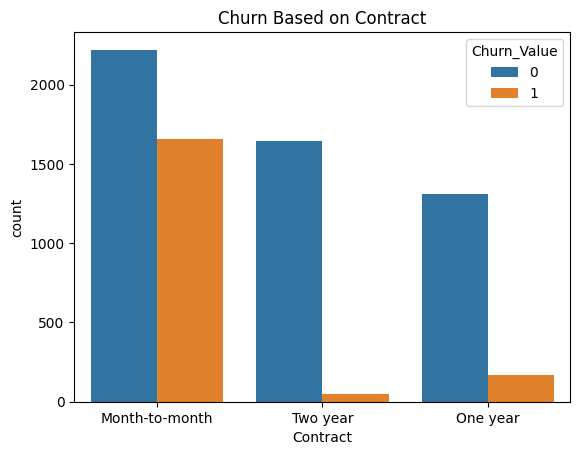

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [14]:
#i want to know churn value based on contract
sns.countplot(x='Contract', hue='Churn_Value', data=df)
plt.title('Churn Based on Contract')
plt.show()

df['Contract'].value_counts()

# Churn based on Internet Service

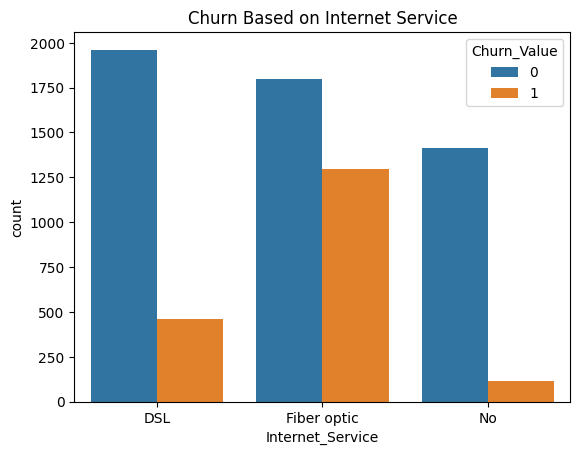

In [23]:
#churn vs internet service
sns.countplot(x='Internet_Service', hue='Churn_Value', data=df)
plt.title('Churn Based on Internet Service')
plt.show()

# Churn based on Monthly Charges

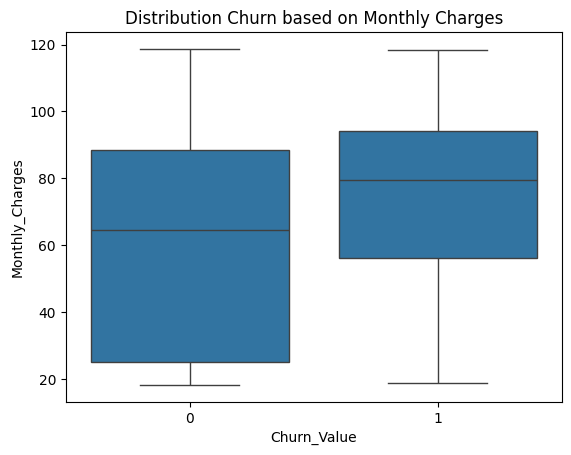

In [24]:
#churn vs monthly charges
sns.boxplot(x='Churn_Value', y='Monthly_Charges', data=df)
plt.title('Distribution Churn based on Monthly Charges')
plt.show()

# Churn based on Tenure

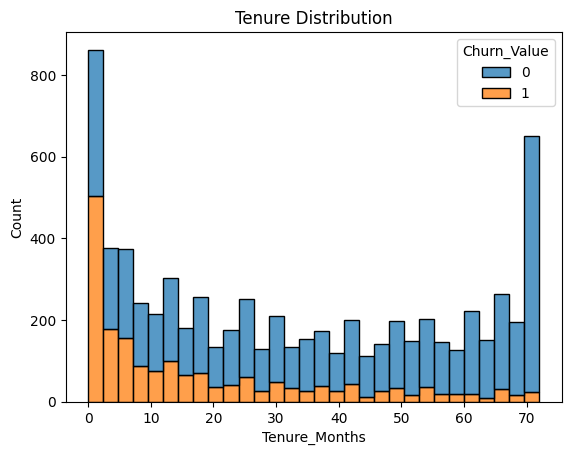

In [25]:
#churn vs tenure
sns.histplot(data=df, x='Tenure_Months', hue='Churn_Value', multiple='stack', bins=30)
plt.title('Tenure Distribution')
plt.show()


#Churn Reasons

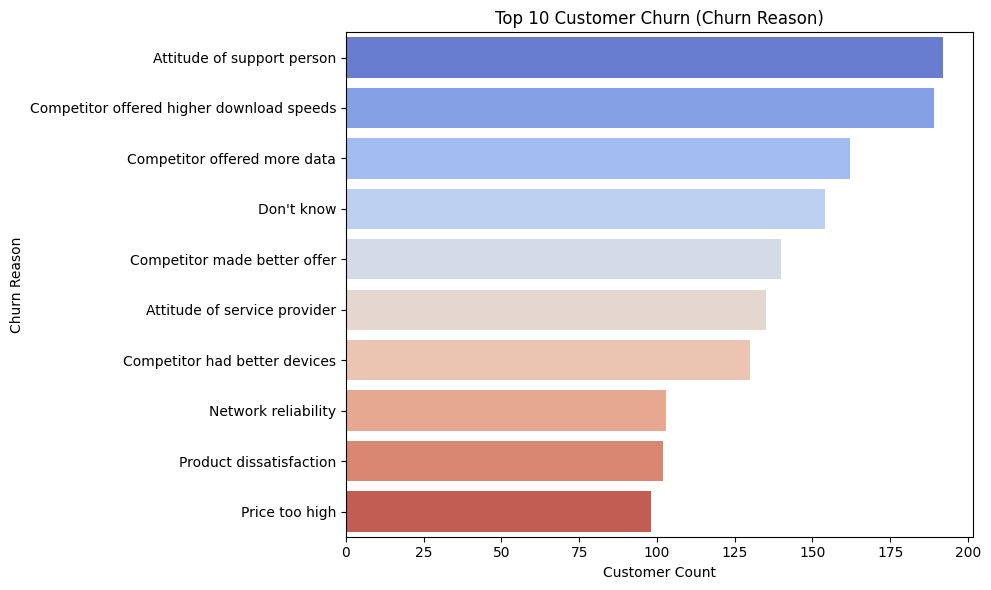

In [26]:
#distribution churn reason
churned = df[df['Churn_Value'] == 1]

reason_counts = churned['Churn_Reason'].dropna().value_counts().head(10)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x=reason_counts.values, y=reason_counts.index, palette="coolwarm")
plt.title("Top 10 Customer Churn (Churn Reason)")
plt.xlabel("Customer Count")
plt.ylabel("Churn Reason")
plt.tight_layout()
plt.show()

# Persentage Churn based on Contract

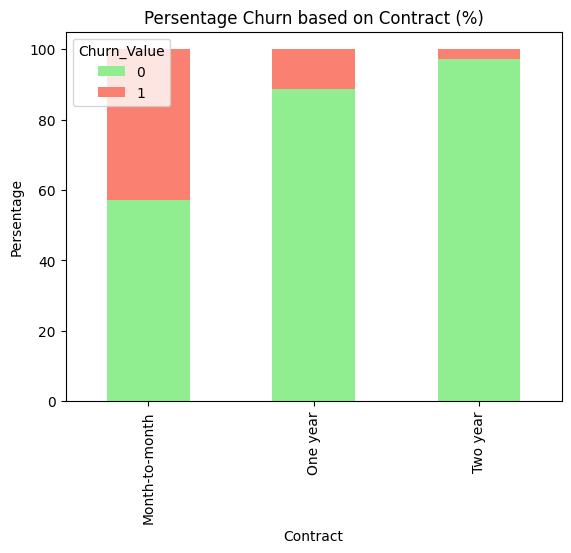

In [27]:
#churn vs contract
pivot_contract = pd.crosstab(df['Contract'], df['Churn_Value'], normalize='index') * 100
pivot_contract.plot(kind='bar', stacked=True, color=['lightgreen','salmon'])
plt.title('Persentage Churn based on Contract (%)')
plt.ylabel('Persentage')
plt.show()

**Conclusion**

Gender is not a determinant of churn.

Churn is common among low-cost customers who use electronic checks, especially in large cities (Los Angeles).

Automatic payment methods (auto-bank/credit card) are associated with lower churn and therefore can be used as a retention strategy.

City segmentation is important; retention strategies in Los Angeles may differ from those in smaller cities.

**Business Recommendations**

Encourage customers to use auto-payment to increase retention.

Provide incentives to low-cost plan customers to stay (e.g., package upgrade promotions).

Focus retention on large cities (Los Angeles, San Diego, San Francisco) that contribute to the highest churn rates.

Retention strategies cannot focus solely on senior citizens. Because non-seniors are more likely to churn, retention strategies for productive age groups are needed, such as contact flexibility, service pricing, or digital services.

The bottom line: City + Payment Method + Monthly Charges is the most influential combination of factors in churn.